$\textbf{Importing packages}$

In [109]:
#importing packages
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt


 $\textbf{Reading Excel file saved in hard drive}$

In [110]:
#reading the file
df = pd.read_excel("share.xlsx")
df

,OBS,PRICE
0,1,975.04
1,2,977.07
2,3,966.58
3,4,964.00
4,5,956.05
...,...,...
989,990,1144.80
990,991,1170.35
991,992,1167.10
992,993,1158.31


$\textbf{Calculating daily returns and daily squared returns from SP500}$

Daily returns (R)
    $$R = 100*ln(P_t/P_{t-1})$$
    
Daily squared returns ($R^{2}$)
   $$R = R^{2}$$

In [111]:
#computing the inflation rate
df['R'] = 100*np.log(df['PRICE']/df['PRICE'].shift(1))
df['R_squared'] = df['R']**2
df = df.dropna(subset=["R"])
df

,OBS,PRICE,R,R_squared
1,2,977.07,0.207980,0.043256
2,3,966.58,-1.079423,1.165154
3,4,964.00,-0.267277,0.071437
4,5,956.05,-0.828108,0.685763
5,6,927.69,-3.011259,9.067679
...,...,...,...,...
989,990,1144.80,1.310082,1.716314
990,991,1170.35,2.207290,4.872129
991,992,1167.10,-0.278081,0.077329
992,993,1158.31,-0.755999,0.571535


$\textbf{Plotting the time series: R and $R^2$}$

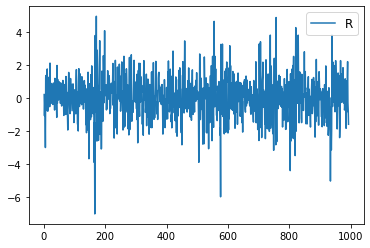

In [112]:
#plotting the R series
plt.plot(df['R'],label='R')
plt.legend(loc='best', fontsize='large')
plt.show()

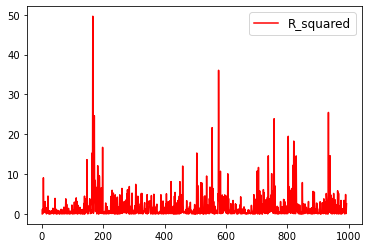

In [113]:
#plotting the R_squared series
plt.plot(df['R_squared'],label='R_squared',color='Red')
plt.legend(loc='best', fontsize='large')
plt.show()

$\textbf{Histogram and descriptive statistics}$

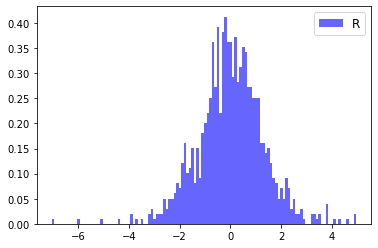

In [114]:
#Plot histogram of R
plt.hist(df['R'],bins=120,label='R', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [115]:
from scipy import stats
stats.describe(df['R'])

DescribeResult(nobs=993, minmax=(-7.043759037302043, 4.964596183505854), mean=0.01573450555862576, variance=1.694877827267905, skewness=-0.1468232170367387, kurtosis=2.016094075647234)

In [116]:
stats.jarque_bera(df['R'])

Jarque_beraResult(statistic=171.7419793855507, pvalue=0.0)

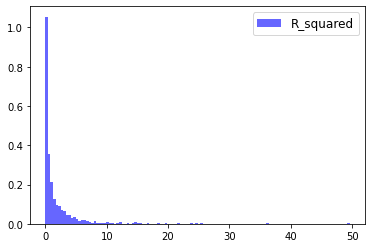

In [117]:
#Plot histogram of R_squared
plt.hist(df['R_squared'],bins=120,label='R_squared', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [118]:
stats.describe(df['R_squared'])

DescribeResult(nobs=993, minmax=(0.0, 49.614541375574206), mean=1.693418576326566, variance=11.506356201573688, skewness=6.16939777089506, kurtosis=59.64692480452559)

In [119]:
stats.jarque_bera(df['R_squared'])

Jarque_beraResult(statistic=153501.31264418407, pvalue=0.0)

$\textbf{ACF , PACF of R}$

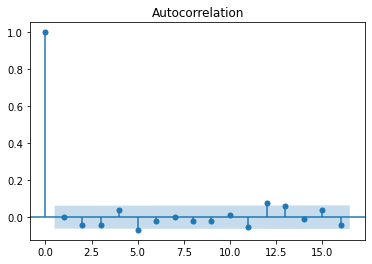

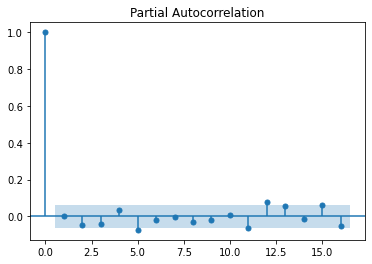

In [120]:
from statsmodels.graphics import tsaplots
fig =tsaplots.plot_acf(df['R'],lags=16)
fig =tsaplots.plot_pacf(df['R'],lags=16)
plt.show()

In [121]:
# Generating the Q tables
import numpy as np
r,q,p = sm.tsa.acf(df['R'].values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.002187   0.004765  0.944967
2.0  -0.044549   1.983469  0.370933
3.0  -0.042759   3.808159  0.282939
4.0   0.036575   5.144571  0.272783
5.0  -0.068961   9.900359  0.078108
6.0  -0.019748  10.290740  0.112930
7.0  -0.001411  10.292735  0.172582
8.0  -0.019274  10.665353  0.221391
9.0  -0.019877  11.062067  0.271479
10.0  0.014334  11.268578  0.336980
11.0 -0.054077  14.210889  0.221543
12.0  0.077208  20.214671  0.063133
13.0  0.059358  23.766889  0.033343
14.0 -0.008254  23.835639  0.047960
15.0  0.039619  25.421426  0.044562
16.0 -0.040201  27.055817  0.040867
17.0  0.014268  27.261915  0.054337
18.0 -0.057071  30.562506  0.032324
19.0  0.021465  31.029898  0.040069
20.0 -0.010472  31.141257  0.053353
21.0 -0.054597  34.171259  0.034738
22.0 -0.015008  34.400460  0.044705
23.0  0.028022  35.200283  0.049681
24.0  0.036951  36.592496  0.048029
25.0 -0.033563  37.742296  0.049009
26.0  0.017079  38.040350  0

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


$\textbf{ACF , PACF of $R^2$}$

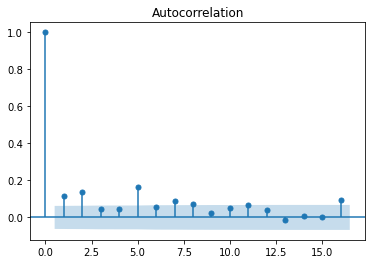

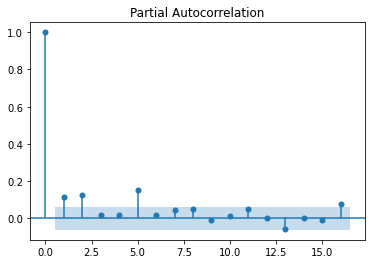

In [122]:
fig =tsaplots.plot_acf(df['R_squared'],lags=16)
fig =tsaplots.plot_pacf(df['R_squared'],lags=16)
plt.show()

In [123]:
# Generating the Q tables
import numpy as np
r,q,p = sm.tsa.acf(df['R_squared'].values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.116401   13.495026  2.391966e-04
2.0   0.137366   32.307886  9.647874e-08
3.0   0.045022   34.330823  1.686854e-07
4.0   0.043314   36.205092  2.625763e-07
5.0   0.163064   62.795866  3.208813e-12
6.0   0.055033   65.827678  2.922824e-12
7.0   0.088429   73.663464  2.678057e-13
8.0   0.072519   78.938732  7.992968e-14
9.0   0.026248   79.630526  1.913609e-13
10.0  0.051198   82.265203  1.803486e-13
11.0  0.065028   86.519895  7.988149e-14
12.0  0.041676   88.269223  1.067025e-13
13.0 -0.014482   88.480668  2.726470e-13
14.0  0.010197   88.585610  7.015944e-13
15.0  0.001769   88.588769  1.817136e-12
16.0  0.091960   97.140862  1.186384e-13
17.0  0.036990   98.525997  1.667347e-13
18.0  0.072813  103.898575  4.253523e-14
19.0  0.076362  109.813725  8.627403e-15
20.0  0.020351  110.234269  1.780030e-14
21.0  0.110912  122.738581  2.240937e-16
22.0  0.050038  125.286355  1.894182e-16
23.0 -0.001192  

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


$\textbf{GARCH(1,1)}$

In [124]:
from arch import arch_model

In [125]:
dt = df['R']
model = arch_model(dt,mean ='Constant', vol ='GARCH', p=1, q=1)
x_1 =model.fit(update_freq=0)
x_1

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1634.7774950799287
            Iterations: 13
            Function evaluations: 76
            Gradient evaluations: 13


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      R   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1634.78
Distribution:                  Normal   AIC:                           3277.55
Method:            Maximum Likelihood   BIC:                           3297.16
                                        No. Observations:                  993
Date:                Tue, Jul 20 2021   Df Residuals:                      992
Time:                        23:10:10   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0416  3.828e-02      1.087      0.277 [-3.34

$\sigma^2_t = 0.0739 + 0.0803*\epsilon_{t-1} + 0.8774*\sigma_{t-1}$

$r_{t} = 0.0416 + \epsilon_t$

$\textbf{ARCH Test}$

In [126]:
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip

$\textbf{ARCH Test of Standardised Residuals}$

In [127]:
std_resid = x_1.resid/x_1.conditional_volatility
res = het_arch(std_resid, nlags=5)
name =['lm','lm_pval','fval','f_pval']
lzip(name,res)

[('lm', 7.752512201608933),
 ('lm_pval', 0.17041295778563273),
 ('fval', 1.5532744693033598),
 ('f_pval', 0.17070402835943274)]

$\textbf{Histogram of Standardised Residuals}$

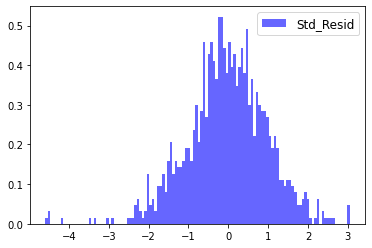

In [128]:
#Historgram of std residuals
plt.hist(std_resid,bins=120,label='Std_Resid', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [129]:
stats.describe(std_resid)

DescribeResult(nobs=993, minmax=(-4.5894770059145475, 3.0469323127109766), mean=-0.03690345219827726, variance=1.0012324803805681, skewness=-0.36830787195222925, kurtosis=1.3412718740326568)

In [130]:
stats.jarque_bera(std_resid)

Jarque_beraResult(statistic=96.88423763663839, pvalue=0.0)

$\textbf{ACF , PACF of Std Residuals}$

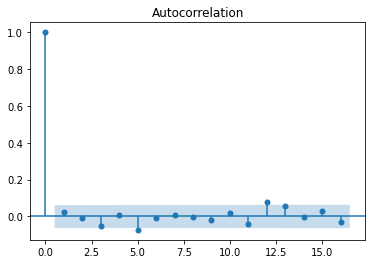

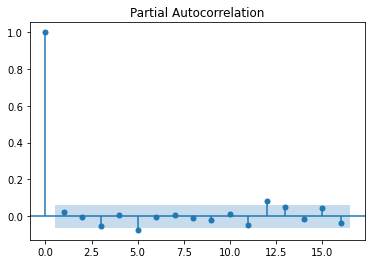

In [131]:
fig =tsaplots.plot_acf(std_resid,lags=16)
fig =tsaplots.plot_pacf(std_resid,lags=16)
plt.show()

$\textbf{Choosing the GARCH lags}$

In [132]:
#running the GARCH(2,1), (1,2)and (2,2)
model_2 = arch_model(dt,mean ='Constant', vol ='GARCH', p=2,q=1)
model_3 = arch_model(dt,mean ='Constant', vol ='GARCH', p=1,q=2)
model_4 = arch_model(dt,mean ='Constant', vol ='GARCH', p=2,q=2)
x_2= model_2.fit(update_freq=0)
x_3= model_3.fit(update_freq=0)
x_4= model_4.fit(update_freq=0)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1634.3777875970884
            Iterations: 14
            Function evaluations: 96
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1634.7774955255713
            Iterations: 13
            Function evaluations: 88
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1632.9634703263373
            Iterations: 11
            Function evaluations: 91
            Gradient evaluations: 11


In [133]:
#Computing the AIC  (AIC_stata= AIC_Python/ no of obs)
n = 993
aic=[x_1.aic/n,x_2.aic/n,x_3.aic/n,x_4.aic/n]
bic= [x_1.bic/n,x_2.bic/n,x_3.bic/n,x_4.bic/n]
name =['GARCH_1,1','GARCH_2,1','GARCH_1,2','GARCH_2,2']
lzip(name,aic, bic)

[('GARCH_1,1', 3.3006596074117396, 3.3204007178409247),
 ('GARCH_2,1', 3.3018686557846695, 3.326545043821151),
 ('GARCH_1,2', 3.3026737070001437, 3.3273500950366253),
 ('GARCH_2,2', 3.301034179912059, 3.3306458455558365)]

$\textbf{Plotting the comparative chart}$

In [134]:
#ARCH(5) model defined as x_5 model
model = arch_model(df['R'],mean ='Constant', vol ='ARCH', p=5)
x_5 =model.fit(update_freq=0)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1639.433689366865
            Iterations: 15
            Function evaluations: 135
            Gradient evaluations: 15


In [135]:
#defining the ARCH (5)'s conditional volatility
dt_1 = x_5.conditional_volatility

In [136]:
#defining the GARCH(1,1)'s conditional volatility. 
#x_1 is defined the GARC(1,1) beforehand
dt_2 = x_1.conditional_volatility

In [137]:
#Deriving the absolute value of R
dta = np.abs(df['R'])

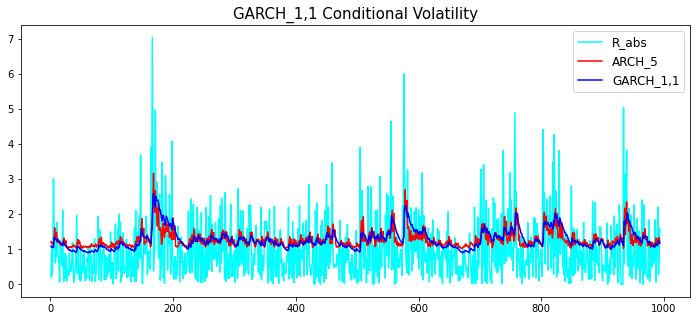

In [138]:
#Plotting the curve
dta.plot(figsize=(12,5), color ='aqua',label='R_abs')
dt_1.plot(figsize=(12,5),color='r', label='ARCH_5')
dt_2.plot(figsize=(12,5),color='b',label ='GARCH_1,1')
plt.title('GARCH_1,1 Conditional Volatility', size=15)
plt.legend(loc='best', fontsize='large')
plt.show()